In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the training data
train_df = pd.read_csv(r'C:\Users\HIRDYANSHI SINGH\Downloads\train (1).csv')

# Display first 5 rows of the dataset
print(train_df.head())


# Handle missing values
train_df["Age"].fillna(train_df["Age"].median(), inplace=True)
train_df["Embarked"].fillna(train_df["Embarked"].mode()[0], inplace=True)

# Convert categorical data into numerical data
train_df["Sex"] = train_df["Sex"].map({"male": 0, "female": 1})
train_df["Embarked"] = train_df["Embarked"].map({"S": 0, "C": 1, "Q": 2})

# Select features and target
features = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]
X = train_df[features]
y = train_df["Survived"]

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = model.predict(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Classification report
print("\nClassification Report:")
print(classification_report(y_val, y_pred))


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
Ac

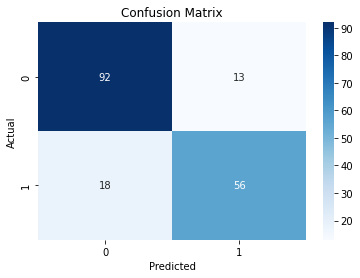

In [2]:
# Generate confusion matrix
cm = confusion_matrix(y_val, y_pred)

# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [3]:
# Load the test data
test_df = pd.read_csv(r'C:\Users\HIRDYANSHI SINGH\Downloads\test (1).csv')

# Display first 5 rows of the test dataset
print(test_df.head())

# Handle missing values in the test data
test_df["Age"].fillna(test_df["Age"].median(), inplace=True)
test_df["Fare"].fillna(test_df["Fare"].median(), inplace=True)
test_df["Embarked"].fillna(test_df["Embarked"].mode()[0], inplace=True)

# Convert categorical data into numerical data
test_df["Sex"] = test_df["Sex"].map({"male": 0, "female": 1})
test_df["Embarked"] = test_df["Embarked"].map({"S": 0, "C": 1, "Q": 2})

# Select features for the test data
X_test = test_df[features]

# Make predictions on the test data
test_predictions = model.predict(X_test)

# Add predictions to the test dataframe
test_df["Survived"] = test_predictions

# Display the first 5 rows with predictions
print(test_df[["PassengerId", "Survived"]].head())

   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S  
   PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         1
4          896         0


In [4]:
# Save predictions to a CSV file
test_df[["PassengerId", "Survived"]].to_csv("test_predictions.csv", index=False)
print("Predictions saved to 'test_predictions.csv'")


Predictions saved to 'test_predictions.csv'
